In [140]:
#general pipeline cycle 



'''

def initialize_parameters_deep(layers_dims):

    return parameters 
    
    
def L_model_forward(X, parameters):

    return AL, caches
    
    
def compute_cost(AL, Y):

    return cost
    
    
def L_model_backward(AL, Y, caches):
    
    return grads
    
    
def update_parameters(parameters, grads, learning_rate):
    
    return parameters
    

'''

'\n\ndef initialize_parameters_deep(layers_dims):\n\n    return parameters \n    \n    \ndef L_model_forward(X, parameters):\n\n    return AL, caches\n    \n    \ndef compute_cost(AL, Y):\n\n    return cost\n    \n    \ndef L_model_backward(AL, Y, caches):\n    \n    return grads\n    \n    \ndef update_parameters(parameters, grads, learning_rate):\n    \n    return parameters\n    \n\n'

In [141]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sklearn, sklearn.datasets


np.random.seed(0)

In [142]:
#Loading the Dataset 

def load_data():
    
    train_X_orig, train_Y_orig = sklearn.datasets.make_circles(n_samples=10000, noise=.10)
    test_X_orig, test_Y_orig = sklearn.datasets.make_circles(n_samples=1000, noise=.10)
    
    train_X = train_X_orig.T
    train_Y = train_Y_orig.reshape(1, -1)
    test_X = test_X_orig.T
    test_Y = test_Y_orig.reshape(1, -1)
    
    
    return train_X, train_Y, test_X, test_Y

train_X.shape, train_Y.shape

((2, 10000), (1, 10000))

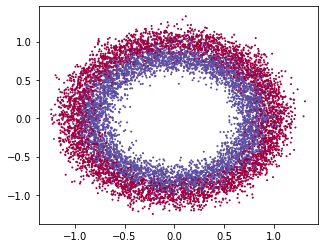

In [143]:
#Visualizing the Data 

train_X, train_Y, test_X, test_Y = load_data()

plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=1, cmap=plt.cm.Spectral)

In [144]:
# Understanding the dataset 

m_train = train_X.shape[1]
num_px = train_X.shape[0]
m_test = test_X.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_X shape: " + str(train_X.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("test_X shape: " + str(test_Y.shape))

Number of training examples: 10000
Number of testing examples: 1000
train_X shape: (2, 10000)
train_Y shape: (1, 10000)
test_X shape: (2, 1000)
test_X shape: (1, 1000)


In [145]:
# Initializing parameters 


layer_dims = [2, 4, 4, 1]     # number of inputs in each layer

def initialize_parameters(layer_dims):
    parameters = {}
    
    for i in range(1, len(layer_dims)):
        parameters['W' + str(i)] = np.random.rand(layer_dims[i],layer_dims[i-1]) * 0.01
        parameters['b' + str(i)] = np.zeros((layer_dims[i],1))
    
    return parameters 


In [146]:
# forward activation functions 

#1. Sigmoid 

def sigmoid(Z):
    
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache


#2. Relu

def relu(Z):
    
    A = np.maximum(0,Z)
    cache = Z
    
    return A, cache 


In [147]:
#backwards activation functions 

#1. Sigmoid Backward

def sigmoid_backward(dA, cache):
    
    Z = cache 
    
    s = 1 / (1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ


#2. Relu Backward

def relu_backward(dA, cache):
    
    Z = cache 
    dZ= np.array(dA, copy=True)
    
    dZ[dZ <= 0] = 0
    
    return dZ


In [148]:
#Forward Propogation 

#function 1/3: linear_forward

def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    
    cache = (A,W,b)
    
    return Z, cache


#function 2/3: linear_activation_forward

def linear_activation_forward(A, W, b, activation):
    
    if activation == 'sigmoid':
        Z, linear_cache = linear_forward(A,W,b)
        A, activation_cache = sigmoid(Z)
        
    
    elif activation == 'relu': 
        Z, linear_cache = linear_forward(A,W,b)
        A, activation_cache = relu(Z)
        
    
    cache = (linear_cache, activation_cache)
    
    return A, cache 


#function 3/3: model_forward

def model_forward(X, parameters):
    
    A = X
    L = len(parameters) // 2
    caches = []
    
    for l in range(1, L):
        A, cache = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(l)], activation='relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)],activation='sigmoid')
    caches.append(cache)
    
    
    return AL, caches
    
    

In [155]:
# computing cost 


def compute_cost(AL, Y):
    m = Y.shape[1]
    
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)
    
    return cost
    

In [175]:
#back propogation

#linear backward

def linear_backward(dZ, cache):
    A, W, b = cache 
    m = A.shape[1]
    
    dW = 1/m * np.dot(dZ, A.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA = np.dot(W.T, dZ)
    
    return dA, dW, db


#activation backward 

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
        dA, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA, dW, db = linear_backward(dZ, linear_cache)
        

#model_backward

def model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    
    dAL = -1 * (np.divide(Y,AL) - np.divide(1-Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads['dA' +str(l)] = dA_temp
        grads['dW'+str(l+1)] = dW_temp
        grads['db'+str(l+1)] = db_temp
        
        
    return grads

In [176]:
# updating parameters

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W' + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * (grads['dW' + str(l+1)])
        parameters['b' + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * (grads['db'+str(l+1)])
        
    return parameters

In [177]:
#predict

def predict(X, parameters):
    
    AL, cache = L_model_forward(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [178]:
#Putting the model together 

def deep_model(X, Y, layer_dims, learning_rate, epochs, print_cost=False):
    costs = []
    parameters = initialize_parameters(layer_dims)
    
    for i in range(epochs):
        AL, caches = model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        
        grads = model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #printing the costs
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
            
    
    return parameters, costs

In [179]:
#training model 

parameters, costs = deep_model(train_X, train_Y, layer_dims, learning_rate = 0.05, epochs = 1000, print_cost = True)

#Test Model
pred_train = predict(train_X, train_Y, parameters)
pred_test = predict(test_X, test_Y, parameters)






TypeError: cannot unpack non-iterable NoneType object